In [1]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import pandas as pd
import numpy as np
from itertools import chain

# Hi-C utilities imports:
import cooler
import bioframe
import cooltools
from cooltools.lib.numutils import fill_diag
from cooltools import insulation
from packaging import version
if version.parse(cooltools.__version__) < version.parse('0.5.2'):
    raise AssertionError("tutorials rely on cooltools version 0.5.2 or higher,"+
                         "please check your cooltools version and update to the latest")

# Visualization imports:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from matplotlib.ticker import EngFormatter

# helper functions for plotting
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    """format ticks with genomic coordinates as human readable"""
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)
        
# Functions to help with plotting
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)
        
# create a functions that would return a series of rectangles around called dots
# in a specific region, and exposing importnat plotting parameters
def rectangles_around_dots(dots_df, region, loc="upper", lw=1, ec="cyan", fc="none"):
    """
    yield a series of rectangles around called dots in a given region
    """
    # select dots from the region:
    df_reg = bioframe.select(
        bioframe.select(dots_df, region, cols=("chrom1","start1","end1")),
        region,
        cols=("chrom2","start2","end2"),
    )
    rectangle_kwargs = dict(lw=lw, ec=ec, fc=fc)
    # draw rectangular "boxes" around pixels called as dots in the "region":
    for s1, s2, e1, e2 in df_reg[["start1", "start2", "end1", "end2"]].itertuples(index=False):
        width1 = e1 - s1
        width2 = e2 - s2
        if loc == "upper":
            yield patches.Rectangle((s2, s1), width2, width1, **rectangle_kwargs)
        elif loc == "lower":
            yield patches.Rectangle((s1, s2), width1, width2, **rectangle_kwargs)
        else:
            raise ValueError("loc has to be uppper or lower")

In [9]:
files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize
    
    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    
    # intra-arm expected
    expected = cooltools.expected_cis(
        clr,
        view_df=hg38_arms,
        nproc=4,
    )
    
    expected.to_csv('../expected/' + file + '.' + resname + '.tsv', sep='\t', header=True)
    
    windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
    insulation_table = insulation(clr, windows, verbose=True)
    
    insulation_table.to_csv('../insulation/' + file + '.' + resname + '.tsv', sep='\t', header=True)
    
    with open('../cool/' + file + '.' + resname + '.pkl', 'wb') as f:
        pickle.dump([expected, insulation_table], f)
    
    print(file + ': completed\n')

0hr


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


0hrcompleted

24hrs


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


24hrscompleted

72hrs


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


72hrscompleted

WTCI


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


WTCIcompleted

KOCI


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


KOCIcompleted

WTCIR


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


WTCIRcompleted

KOCIR


INFO:root:Processing region chr1
INFO:root:Processing region chr2
INFO:root:Processing region chr3
INFO:root:Processing region chr4
INFO:root:Processing region chr5
INFO:root:Processing region chr6
INFO:root:Processing region chr7
INFO:root:Processing region chr8
INFO:root:Processing region chr9
INFO:root:Processing region chr10
INFO:root:Processing region chr11
INFO:root:Processing region chr12
INFO:root:Processing region chr13
INFO:root:Processing region chr14
INFO:root:Processing region chr15
INFO:root:Processing region chr16
INFO:root:Processing region chr17
INFO:root:Processing region chr18
INFO:root:Processing region chr19
INFO:root:Processing region chr20
INFO:root:Processing region chr21
INFO:root:Processing region chr22
INFO:root:Processing region chrX
INFO:root:Processing region chrY
INFO:root:Processing region chrM


KOCIRcompleted



0hr
0hr: completed

24hrs
24hrs: completed

72hrs
72hrs: completed

WTCI
WTCI: completed

KOCI
KOCI: completed

WTCIR
WTCIR: completed

KOCIR
KOCIR: completed



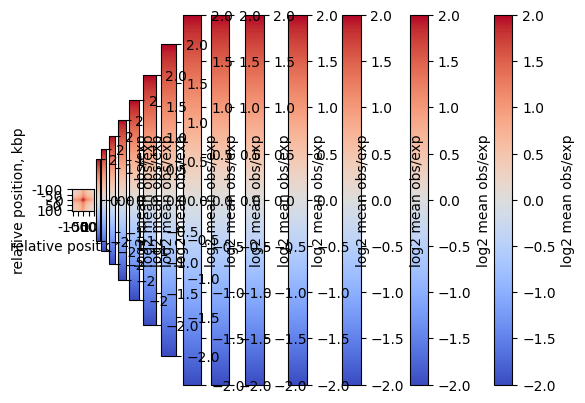

In [14]:
files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize
    
    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    
    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    
    primary = bioframe.read_table('../loop/primary.5kb.bedpe', schema='bedpe').query(f'chrom1 in {clr.chromnames}')
    extended = bioframe.read_table('../loop/extended.5kb.bedpe', schema='bedpe').query(f'chrom1 in {clr.chromnames}')
    
    loops = ['primary', 'extended']
    
    for loop_type in loops:
        exec('paired_sites = ' + loop_type)
        paired_sites.loc[:, 'mid1'] = (paired_sites['start1'] + paired_sites['end1'])//2
        paired_sites.loc[:, 'mid2'] = (paired_sites['start2'] + paired_sites['end2'])//2
        
        # create the stack of snips:
        flank_bp=100_000
        stack = cooltools.pileup(clr, paired_sites, view_df=hg38_arms, expected_df=expected, flank=flank_bp)
        
        mtx = np.nanmean(stack, axis=2)
        
        with open('../plot/' + file + '.' + loop_type + '.' + resname + '.pkl', 'wb') as f:
            pickle.dump([resolution, flank_bp, mtx], f)
        
        plt.imshow(
            np.log2(mtx),
            vmax = 2,
            vmin = -2,
            cmap='coolwarm')

        plt.colorbar(label = 'log2 mean obs/exp')
        ticks_pixels = np.linspace(0, flank_bp*2//resolution,5)
        ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
        plt.xticks(ticks_pixels, ticks_kbp)
        plt.yticks(ticks_pixels, ticks_kbp)
        plt.xlabel('relative position, kbp')
        plt.ylabel('relative position, kbp')
        
        plt.savefig('../plot/' + file + '.' + loop_type + '.' + resname + '.pdf')
        plt.clf()
        
    print(file + ': completed\n')

In [20]:
files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    
    loops = ['primary', 'extended']
    
    for loop_type in loops:
        
        # create the stack of snips:
        flank_bp=100_000
        
        with open('../plot/' + file + '.' + loop_type + '.' + resname + '.pkl', 'rb') as f:
            resolution, flank_bp, mtx = pickle.load(f)
        
        plt.imshow(
            np.log2(mtx),
            vmax = 2,
            vmin = 0,
            cmap='coolwarm')

        plt.colorbar(label = 'log2 mean obs/exp')
        ticks_pixels = np.linspace(0, flank_bp*2//resolution,5)
        ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
        plt.xticks(ticks_pixels, ticks_kbp)
        plt.yticks(ticks_pixels, ticks_kbp)
        plt.xlabel('relative position, kbp')
        plt.ylabel('relative position, kbp')
        
        plt.savefig('../plot/' + file + '.' + loop_type + '.' + resname + '.pdf')
        plt.clf()
        
    print(file + ': completed\n')

0hr
0hr: completed

24hrs
24hrs: completed

72hrs
72hrs: completed

WTCI
WTCI: completed

KOCI
KOCI: completed

WTCIR
WTCIR: completed

KOCIR
KOCIR: completed



<Figure size 640x480 with 0 Axes>

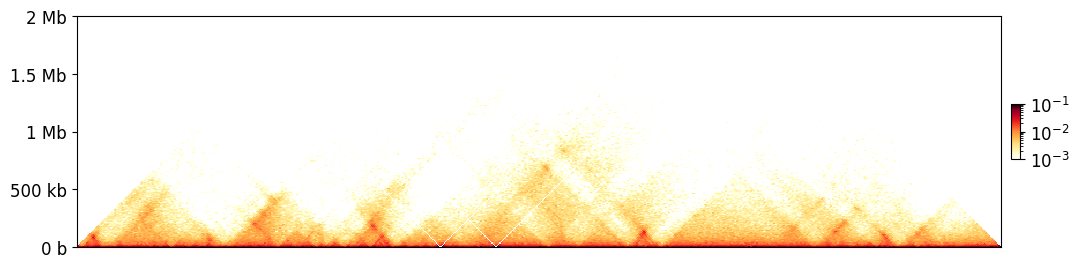

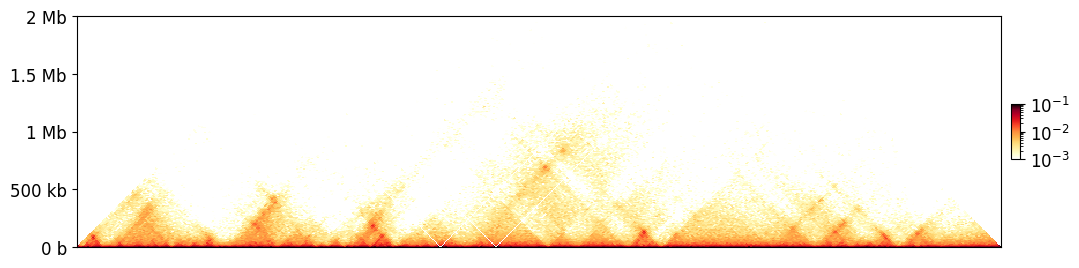

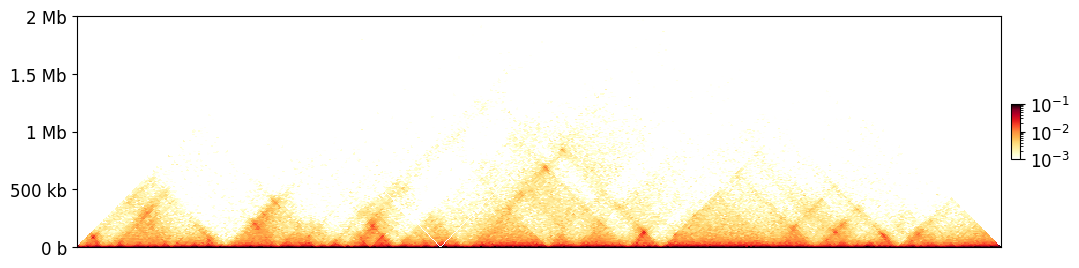

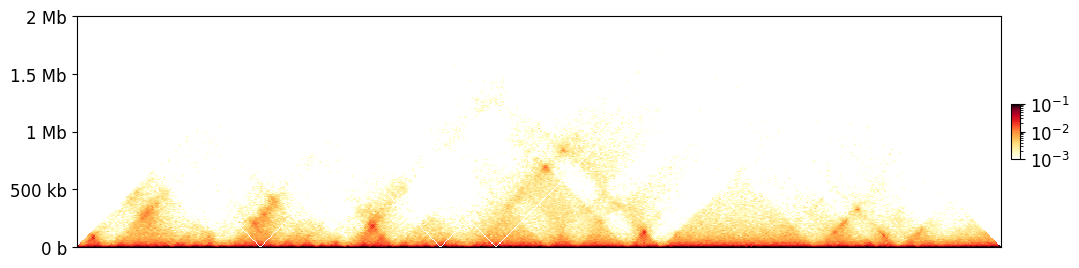

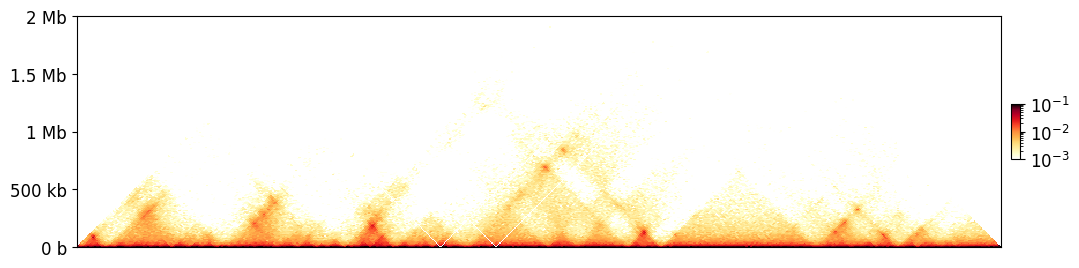

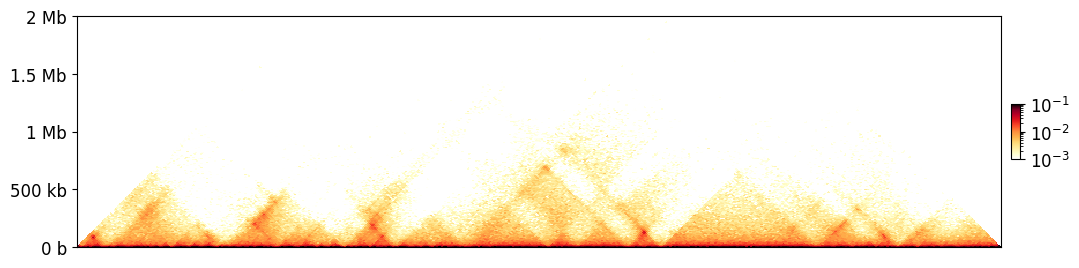

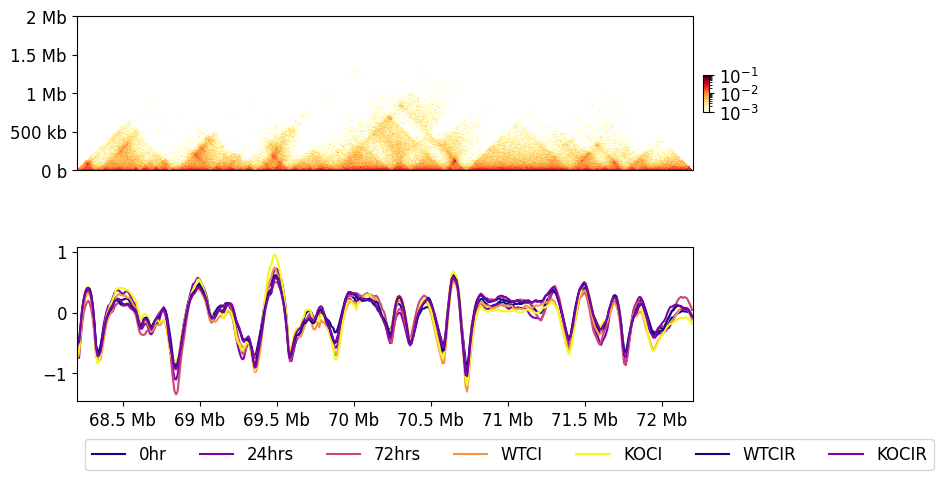

In [7]:
import cooltools.lib.plotting

res_kb = 10
resname = f'{res_kb}kb'
resval = f'{res_kb}000'

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
plt.rcParams['font.size'] = 12

start = 68_200_000
end = start+ 40*res
region = ('chr12', start, end)

for file in files:
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize

    windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
    res = windows[2]

    norm = LogNorm(vmax=0.1, vmin=0.001)
    data = clr.matrix(balance=True).fetch(region)
    f, ax = plt.subplots(figsize=(18, 6))
    im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
    ax.set_aspect(0.5)
    ax.set_ylim(0, (end-start)/2)
    format_ticks(ax, rotate=False)
    ax.xaxis.set_visible(False)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
    plt.colorbar(im, cax=cax)

    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    
    good_bin = insulation_table[~insulation_table['is_bad_bin']]
    
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    bioframe.to_bigwig(good_bin[['chrom','start','end',f'log2_insulation_score_{res}']], hg38_chromsizes, '../insulation/' + file + '.' + str(res) + '.bigWig')
    
    #boundaries = insulation_table[~np.isnan(insulation_table[f'boundary_strength_{res}'])]
    #strong_boundaries = boundaries[boundaries[f'is_boundary_{res}']]

    #strong_boundaries.to_csv('../insulation/' + file + '.boundaries.' + str(res) + '.tsv', sep='\t', header=True)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    insul_region = bioframe.select(insulation_table, region)
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'{file}')
    
ins_ax.legend(bbox_to_anchor=(0, -0.5), loc='lower left', ncol=len(files));

# plt.savefig(f'../plot/MDM2.{resname}.insulation_{res}.pdf')

In [10]:
import cooltools.lib.plotting

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    flank=300_000
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    windows = [3*resolution, 5*resolution, 10*resolution, 25*resolution]
    res = windows[2]
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize
    
    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    
    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    
    bound = bioframe.read_table('../bed/Merged.100kb.boundaries.bed', schema='bed').query(f'chrom in {clr.chromnames}')
    bound['mid'] = (bound.end+bound.start)//2
    
    stack = cooltools.pileup(clr, bound, view_df=hg38_arms, flank=300_000)
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log10(mtx),
        vmin = -3,
        vmax = -1,
        cmap='fall',
        interpolation='none')
    plt.colorbar(label = 'log10 mean ICed Hi-C')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.boundaries.' + resname + '.pdf')
    plt.clf()
    
    stack = cooltools.pileup(clr, bound, view_df=hg38_arms, expected_df=expected, flank=300_000)
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log2(mtx),
        vmax = 1.0,
        vmin = -1.0,
        cmap='coolwarm',
        interpolation='none')

    plt.colorbar(label = 'log2 mean obs/exp')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.boundaries.expected.' + resname + '.pdf')
    plt.clf()
        
    print(file + ': completed\n')

0hr
0hr: completed

24hrs
24hrs: completed

72hrs
72hrs: completed

WTCI
WTCI: completed

KOCI
KOCI: completed

WTCIR
WTCIR: completed

KOCIR
KOCIR: completed



<Figure size 640x480 with 0 Axes>

In [12]:
import cooltools.lib.plotting

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    flank=300_000
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize
    
    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    
    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    
    DEG = bioframe.read_table('../bed/Promoter.DEG.chromosomal.bed', schema='bed').query(f'chrom in {clr.chromnames}')
    DEG['mid'] = (DEG.end+DEG.start)//2
    
    stack = cooltools.pileup(clr, DEG, view_df=hg38_arms, flank=300_000)
    mask = np.array(DEG.strand == '-', dtype=bool)
    stack[:, :, mask] = stack[::-1, ::-1, mask]
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log10(mtx),
        vmin = -3,
        vmax = -1,
        cmap='fall',
        interpolation='none')
    plt.colorbar(label = 'log10 mean ICed Hi-C')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.DEG.' + resname + '.pdf')
    plt.clf()
    
    stack = cooltools.pileup(clr, DEG, view_df=hg38_arms, expected_df=expected, flank=300_000)
    mask = np.array(DEG.strand == '-', dtype=bool)
    stack[:, :, mask] = stack[::-1, ::-1, mask]
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log2(mtx),
        vmax = 1.0,
        vmin = -1.0,
        cmap='coolwarm',
        interpolation='none')

    plt.colorbar(label = 'log2 mean obs/exp')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.DEG.expected.' + resname + '.pdf')
    plt.clf()
        
    print(file + ': completed\n')

0hr
0hr: completed

24hrs
24hrs: completed

72hrs
72hrs: completed

WTCI
WTCI: completed

KOCI
KOCI: completed

WTCIR
WTCIR: completed

KOCIR
KOCIR: completed



<Figure size 640x480 with 0 Axes>

In [2]:
import cooltools.lib.plotting

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']

for file in files:
    flank=300_000
    
    print(file)
    res_kb = 10
    resname = f'{res_kb}kb'
    resval = f'{res_kb}000'
    
    data_dir = '../cool/'
    cool_file = data_dir + file + '.' + resname + '.mcool'
    clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
    resolution = clr.binsize
    
    # Use bioframe to fetch the genomic features from the UCSC.
    hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
    hg38_cens = bioframe.fetch_centromeres('hg38')
    hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)
    
    with open('../cool/' + file + '.' + resname + '.pkl', 'rb') as f:
        expected, insulation_table = pickle.load(f)
    
    # TADs from 300-400 kb
    DEG = bioframe.read_table('../bed/TAD.300-400kb.bed', schema='bed').query(f'chrom in {clr.chromnames}')
    DEG['mid'] = (DEG.end+DEG.start)//2
    
    stack = cooltools.pileup(clr, DEG, view_df=hg38_arms, flank=300_000)
    mask = np.array(DEG.strand == '-', dtype=bool)
    stack[:, :, mask] = stack[::-1, ::-1, mask]
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log10(mtx),
        vmin = -3,
        vmax = -1,
        cmap='fall',
        interpolation='none')
    plt.colorbar(label = 'log10 mean ICed Hi-C')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.TAD.300-400kb.' + resname + '.pdf')
    plt.clf()
    
    stack = cooltools.pileup(clr, DEG, view_df=hg38_arms, expected_df=expected, flank=300_000)
    mask = np.array(DEG.strand == '-', dtype=bool)
    stack[:, :, mask] = stack[::-1, ::-1, mask]
    mtx = np.nanmean(stack, axis=2)
    
    plt.imshow(
        np.log2(mtx),
        vmax = 1.0,
        vmin = -1.0,
        cmap='coolwarm',
        interpolation='none')

    plt.colorbar(label = 'log2 mean obs/exp')
    ticks_pixels = np.linspace(0, flank*2//resolution,5)
    ticks_kbp = ((ticks_pixels-ticks_pixels[-1]/2)*resolution//1000).astype(int)
    plt.xticks(ticks_pixels, ticks_kbp)
    plt.yticks(ticks_pixels, ticks_kbp)
    plt.xlabel('relative position, kbp')
    plt.ylabel('relative position, kbp')

    plt.savefig('../plot/' + file + '.TAD.300-400kb.expected.' + resname + '.pdf')
    plt.clf()
        
    print(file + ': completed\n')

0hr
0hr: completed

24hrs
24hrs: completed

72hrs
72hrs: completed

WTCI
WTCI: completed

KOCI
KOCI: completed

WTCIR
WTCIR: completed

KOCIR
KOCIR: completed



<Figure size 640x480 with 0 Axes>

In [3]:
import cooltools.lib.plotting

res_kb = 10
resname = f'{res_kb}kb'
resval = f'{res_kb}000'
resvalue = res_kb * 1_000

files = ['WTCI', 'KOCI']
specific = 'KOCI.filtered'

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
plt.rcParams['font.size'] = 12

diff_loop = bioframe.read_table('../HiCCUPS_Diff/bed/' + specific + '.region.bed', schema='bed')

flank = 1_000_000

for i in diff_loop.index:
    chrom = diff_loop['chrom'][i]
    start = int((diff_loop['start'][i] - flank)/resvalue)*resvalue
    end = int((diff_loop['end'][i] + flank)/resvalue)*resvalue
    
    region = (chrom, start, end)
    
    fig, axs = plt.subplots(2, sharex=True, figsize=(18, 18))
    
    for file_index in range(len(files)):
        file = files[file_index]
        data_dir = '../cool/'
        cool_file = data_dir + file + '.' + resname + '.mcool'
        clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
        resolution = clr.binsize

        norm = LogNorm(vmax=0.1, vmin=0.001)
        data = clr.matrix(balance=True).fetch(region)
        im = pcolormesh_45deg(axs[file_index], data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
        axs[file_index].set_aspect(0.5)
        axs[file_index].set_ylim(0, (end-start))
        format_ticks(axs[file_index], rotate=False)
        axs[file_index].xaxis.set_visible(False)

        divider = make_axes_locatable(axs[file_index])
        cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
        plt.colorbar(im, cax=cax)
        
        axs[file_index].set_title(file)
        axs[file_index].set_xlim(region[1], region[2])
        
    plt.savefig('../HiCCUPS_Diff/plot/'+specific+'/'+chrom+f'_{int((start+end)/2e3)}kb.pdf', dpi=1200)
    plt.clf()
    
    print((i+1)/len(diff_loop))

Float64Index([inf, 1.0, 0.5, 0.3333333333333333], dtype='float64')
Float64Index([inf, 2.0, 1.0, 0.6666666666666666], dtype='float64')
Float64Index([inf, 3.0, 1.5, 1.0], dtype='float64')
Float64Index([inf, 4.0, 2.0, 1.3333333333333333], dtype='float64')


<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [3]:
import cooltools.lib.plotting

res_kb = 10
resname = f'{res_kb}kb'
resval = f'{res_kb}000'
resvalue = res_kb * 1_000

files = ['0hr', '24hrs', '72hrs', 'WTCI', 'KOCI', 'WTCIR', 'KOCIR']
specific = 'KOCI.filtered'

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import bioframe
plt.rcParams['font.size'] = 12

diff_loop = bioframe.read_table('../HiCCUPS_Diff/bed/' + specific + '.region.bed', schema='bed')

flank = 500_000

for i in diff_loop.index:
    chrom = diff_loop['chrom'][i]
    start = int((diff_loop['start'][i] - flank)/resvalue)*resvalue
    end = int((diff_loop['end'][i] + flank)/resvalue)*resvalue
    
    region = (chrom, start, end)
    
    fig, axs = plt.subplots(len(files), sharex=True, figsize=(9*len(files), 18))
    
    for file_index in range(len(files)):
        file = files[file_index]
        data_dir = '../cool/'
        cool_file = data_dir + file + '.' + resname + '.mcool'
        clr = cooler.Cooler(cool_file + '::/resolutions/' + resval)
        resolution = clr.binsize

        norm = LogNorm(vmax=0.1, vmin=0.001)
        data = clr.matrix(balance=True).fetch(region)
        im = pcolormesh_45deg(axs[file_index], data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
        axs[file_index].set_aspect(0.5)
        axs[file_index].set_ylim(0, (end-start))
        format_ticks(axs[file_index], rotate=False)
        axs[file_index].xaxis.set_visible(False)

        divider = make_axes_locatable(axs[file_index])
        cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
        plt.colorbar(im, cax=cax)
        
        axs[file_index].set_title(file)
        axs[file_index].set_xlim(region[1], region[2])
        
    plt.savefig('../HiCCUPS_Diff/plot/'+specific+'/'+chrom+f'_{int((start+end)/2e3)}kb.pdf', dpi=300)
    plt.clf()
    
    print((i+1)/len(diff_loop))

0.25
0.5
0.75
1.0


<Figure size 6300x1800 with 0 Axes>

<Figure size 6300x1800 with 0 Axes>

<Figure size 6300x1800 with 0 Axes>

<Figure size 6300x1800 with 0 Axes>